In [1]:
from neuron import h, load_mechanisms
from netpyne import specs, sim
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
h.load_file("stdrun.hoc")

cwd = os.getcwd()
mod_dir = '/Users/katedoxey/Desktop/research/projects/tinnitus model/code/DCN_model/mod'
load_mechanisms(mod_dir)

True

In [3]:
cell_types = ['P', 'I2', 'W', 'AN']
record_cells = [(f'{cell_type}_pop', 0) for cell_type in cell_types]

cfg = specs.SimConfig()	
cfg.duration = 1000				                 
cfg.dt = 0.05								                # Internal integration timestep to use
cfg.verbose = True							                # Show detailed messages
cfg.recordTraces = {'V_soma': {'sec': 'soma', 'loc': 0.5, 'var': 'v'}}
cfg.recordStep = 0.1
# cfg.recordStim = True
# cfg.filename = os.path.join(sim_dir, f'{sim_label}-DCN') 	# Set file output name
cfg.savePickle = False
cfg.analysis['plotTraces'] = {'include': record_cells, 'saveFig': False, 'showFig': False}  # Plot recorded traces for this list of cells
# cfg.analysis['plotSpikeFreq'] = {'include': ['all'], 'saveFig': True, 'showFig': True}
cfg.hParams['celsius'] = 34.0 
cfg.hParams['v_init'] = -60

In [17]:
netParams = specs.NetParams()

IzhCell = {'secs': {}}
IzhCell['secs']['soma'] = {'geom': {}, 'pointps': {}}                        # soma params dict
IzhCell['secs']['soma']['geom'] = {'diam': 50, 'L': 50, 'cm': 1}    # soma geometry, cm = 31.831
IzhCell['secs']['soma']['pointps']['Izhi'] = {                               # soma Izhikevich properties
    'mod':'Izhi2007b',
    'C':1,
    'k': 0.7,
    'vr':-60,
    'vt':-40,
    'vpeak':35,
    'a':0.03,
    'b':-2,
    'c':-50,
    'd':100,
    'celltype':1}
IzhCell['secs']['soma']['threshold'] = -20
netParams.cellParams['IzhCell'] = IzhCell 


In [18]:
pop_labels_nums = {cell_type: 1 for cell_type in cell_types}

for pop_label, pop_num in pop_labels_nums.items():
    netParams.popParams[f'{pop_label}_pop'] = {'cellType': 'IzhCell',
                                                'numCells': pop_num}

In [19]:
netParams.synMechParams['exc'] = {'mod': 'ExpSyn', 'tau': 3, 'e': -10}
netParams.synMechParams['inh'] = {'mod': 'ExpSyn', 'tau': 10, 'e': -70}


In [20]:
netParams.connParams['AN->W'] = {
    'preConds': {'pop': 'AN_pop'},
    'postConds': {'pop': 'W_pop'},
    'synsPerConn': 1,
    'synMech': 'exc',
    'weight': 0.06,
    'connList': [[0,0]]
}

netParams.connParams['AN->I2'] = {
    'preConds': {'pop': 'AN_pop'},
    'postConds': {'pop': 'I2_pop'},
    'synsPerConn': 1,
    'synMech': 'exc',
    'weight': 0.55,
    'connList': [[0,0]]
}

netParams.connParams['AN->P'] = {
    'preConds': {'pop': 'AN_pop'},
    'postConds': {'pop': 'P_pop'},
    'synsPerConn': 1,
    'synMech': 'exc',
    'weight': 0.25,
    'connList': [[0,0]]
}

### Inhibitory ###
netParams.connParams['W->I2'] = {
    'preConds': {'pop': 'W_pop'},
    'postConds': {'pop': 'I2_pop'},
    'synsPerConn': 1,
    'synMech': 'inh',
    'weight': 1.4,
    'connList': [[0,0]]
}


netParams.connParams['W->P'] = {
    'preConds': {'pop': 'W_pop'},
    'postConds': {'pop': 'P_pop'},
    'synsPerConn': 1,
    'synMech': 'inh',
    'weight': 0.1,
    'connList': [[0,0]]
}


netParams.connParams['I2->P'] = {
    'preConds': {'pop': 'I2_pop'},
    'postConds': {'pop': 'P_pop'},
    'synsPerConn': 1,
    'synMech': 'inh',
    'weight': 2.25,
    'connList': [[0,0]]
}


In [21]:
# netParams.popParams[f'vecstim_NSA'] = {
#                 'cellModel': 'VecStim',
#                 'numCells': 1,  # int(len(syn_secs)/4),
#                 'spikePattern': {'type': 'poisson',
#                                 'start': 0,
#                                 'stop': -1,
#                                 'frequency': 40}  #  np.random.randint(params.spk_freq_lb, params.spk_freq_ub, 1)[0]}
#             }

# netParams.connParams[f'vecstim_NSA->P'] = {
#     'preConds': {'pop': f'vecstim_NSA'},
#     'postConds': {'pop': 'P_pop'},
#     'sec': 'soma',
#     'synsPerConn': 1,
#     'synMech': 'exc',
#     'weight': 1,  # 
#     # 'synMechWeightFactor': [0.5,0.5],
#     'delay': 'defaultDelay + dist_2D/propVelocity',
#     'probability': 1.0,
#     'connList': [0,0]
# }

netParams.stimSourceParams['bkg_AN'] = {'type': 'NetStim', 'rate': 15, 'noise': 1}
netParams.stimTargetParams['bkg_AN->ALL'] = {'source': 'bkg_AN', 'conds': {'pop': ['AN_pop']}, 'weight': 0.02, 'delay': 0, 'synMech': 'exc'}



Start time:  2025-01-08 17:14:05.463938

Creating network of 4 cell populations on 1 hosts...
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=0) of pop P_pop, on node 0, 
Instantiated 1 cells of population P_pop
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=1) of pop I2_pop, on node 0, 
Instantiated 1 cells of population I2_pop
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=2) of pop W_pop, on node 0, 
Instantiated 1 cells of population W_pop
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=3) of pop AN_pop, on node 0, 
Instantiated 1 cells of population AN_pop
  Number of cells on node 0: 4 
  Done; cell creation time = 0.00 s.
Making connections...
Generating set of connections from list (rule: AN->W) ...
  Created connection preGid=3, postGid=2, sec=soma, loc=0.5, synMech=exc, weight=0.06, delay=1.00
Generating set of connections from list (rule: AN->I2) ...
  C

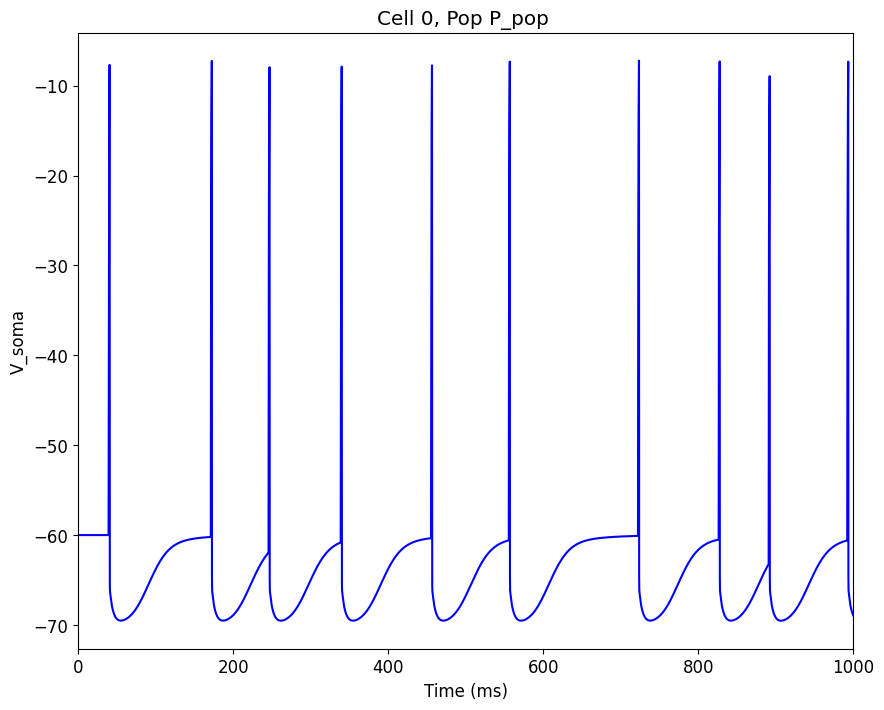

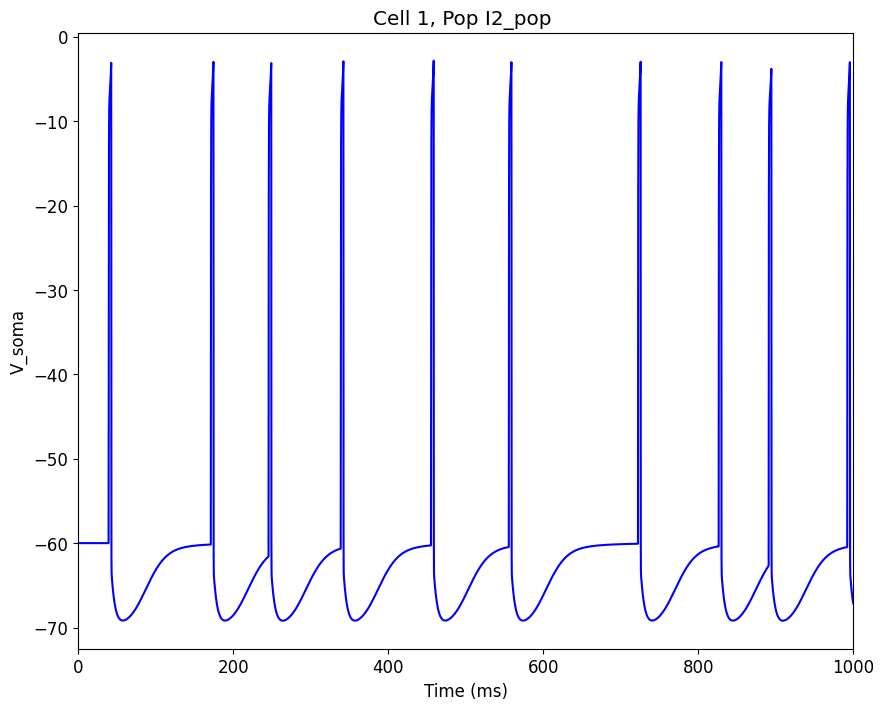

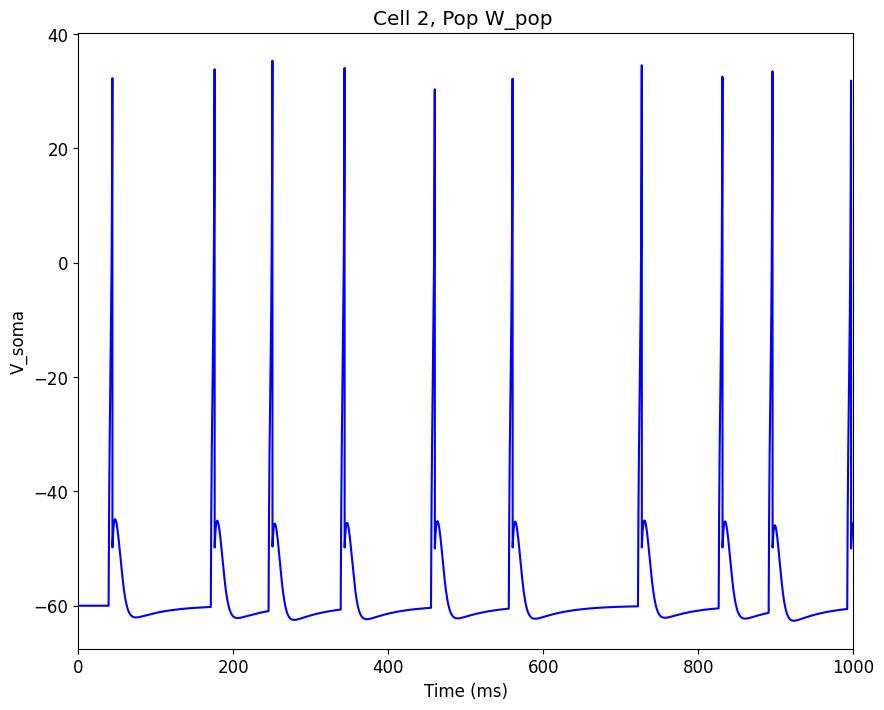

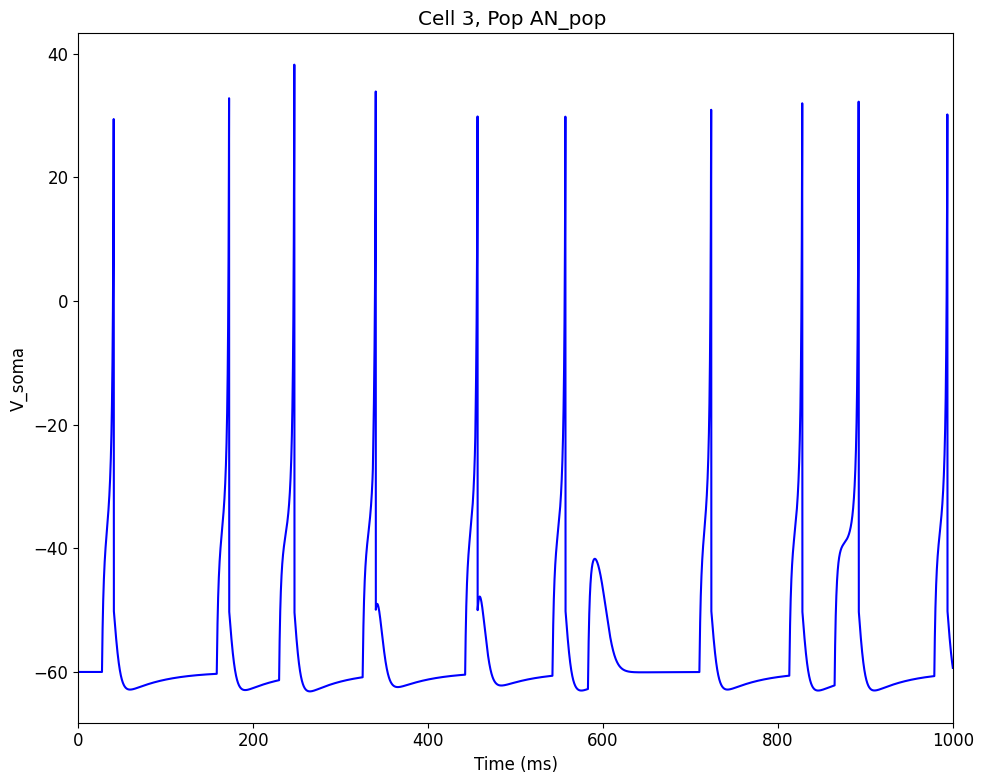

In [22]:
(pops, cells, conns, stims, simData) = sim.createSimulateAnalyze(netParams=netParams, simConfig=cfg, output=True)

In [10]:
times = np.array(simData['spkt'])
spikes = np.array(simData['spkid'])

base_colors = ['tab:red', 'tab:green', 'tab:purple', 'tab:orange', 'tab:blue']
colors = {f'{pop_label}_pop': base_colors[i] for i, pop_label in enumerate(pop_labels_nums.keys())}
colors['vecstim_NSA'] = base_colors[-1]